In [1]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

2021-09-16 19:53:26.286063: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
pre_train = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
training_data = pre_train.flow_from_directory(
    "../input/hand-gesture-cricket/My_Hand_Gesture_Dataset/Training_Data",
    target_size=(300,300),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32,
    subset='training'
)

Found 35200 images belonging to 11 classes.


In [3]:
valid_data = pre_train.flow_from_directory(
    "../input/hand-gesture-cricket/My_Hand_Gesture_Dataset/Training_Data",
    target_size=(300,300),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32,
    subset='validation'
)

Found 8800 images belonging to 11 classes.


(32, 300, 300, 3)


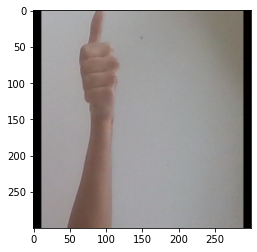

(32, 300, 300, 3)


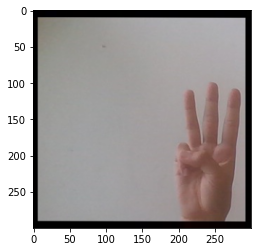

(32, 300, 300, 3)


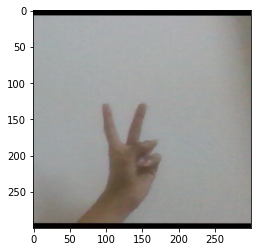

In [4]:
for i in range(3):
    img, label = training_data.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

In [5]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[300,300,3]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=11, activation='softmax'))

2021-09-16 19:53:51.832214: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-16 19:53:51.836101: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-16 19:53:51.882309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-16 19:53:51.883339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-16 19:53:51.883389: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-16 19:53:51.917596: I tensorflow/stream_executor/platform/def

In [6]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
early_stop= EarlyStopping(monitor= 'val_loss', patience= 1)
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [8]:
cnn.fit(x = training_data, validation_data = valid_data, epochs = 25, callbacks=[early_stop])

2021-09-16 19:53:54.893895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-16 19:53:54.898407: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/25


2021-09-16 19:53:55.615876: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-16 19:53:56.600648: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-16 19:53:56.640113: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


1100/1100 [==============================] - 1008s 910ms/step - loss: 2.0784 - accuracy: 0.2032 - val_loss: 0.8535 - val_accuracy: 0.6545
Epoch 2/25
1100/1100 [==============================] - 920s 836ms/step - loss: 0.4256 - accuracy: 0.8315 - val_loss: 0.6788 - val_accuracy: 0.7757
Epoch 3/25
1100/1100 [==============================] - 915s 832ms/step - loss: 0.2555 - accuracy: 0.9029 - val_loss: 0.4723 - val_accuracy: 0.8384
Epoch 4/25
1100/1100 [==============================] - 919s 835ms/step - loss: 0.1833 - accuracy: 0.9334 - val_loss: 0.5054 - val_accuracy: 0.8416


In [11]:
cnn.save("HandGest3.h5") 

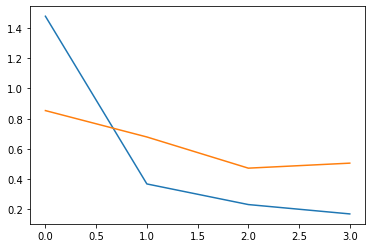

In [10]:
plt.plot(cnn.history.history['loss'])
plt.plot(cnn.history.history['val_loss'])
plt.show()